# 신경망 생성
- `torch.nn` 패키지 사용

- `nn.Module`을 상속받고, 해당 모듈은 계층과 `output`을 반환하는 `forward`메소드를 포함

- 파이토치에서 신경망 생성을 위한 기본 틀

      1. class Net(nn.Module):

           def __init__(self):
               super(Net, self).__init__()

      2. class MyModel(nn.Module):

            def __init__(self):
                super(MyModel, self).__init__()

- `conv2d` 레이어를 쌓을 때, 필터의 갯수를 계산하고 `in_channels`에 넣어줘야함

#### 신경망 정의

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
# class Net(nn.Module):    #nn에 있는 모듈을 상속 받게 

#     def __init__(self):
#         super(Net, self).__init__()

#         self.conv1 = nn.Conv2d(1, 6, 3)  # 신경망의 구조 정의
#         self.conv2 = nn.Conv2d(6, 16, 3)
#         self.fc1 = nn.Linear(16 * 6 * 6, 120 )
#         self.fc2 = nn.Linear(120, 84)
#         self.fc2 = nn.Linear(84, 10)

# def forward(self, x): 
#     x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) #입력으로 통과한 x가 현재 conv통과하고 relu계산하고 pooling거침
#     x = F.max_pool2d(F.relu(self.conv2(x)), 2)
#     x = x.view(-1, self.num_flat_features(x))
#     x = F.relu(self.fc1(x))
#     x = F.relu(self.fc2(x))
#     x = self.fc3(x)
#     return x

# def num_flat_features(self, x):
#     size = x.size()[1:]
#     num_features = 1
#     for s in size:
#         num_features *= s

#         return num_features

# net =Net()
# print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)


#### 선형회귀(Linear Regression) 모델 생성

In [10]:
# modules import
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

C:\Users\Owner\AppData\Local\Temp\ipykernel_34196\379376291.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


#### 데이터 생성 및 회귀식 설정
- torch.rand(): 0, 1 분포 안에서 랜덤한 tensor생성
- torch.randn(): 정규분포 안에서 랜덤한 tensor 생성,  x < high로 생성 
- torch.randint(): 정수로 채워진 랜덤한 tensor 생성

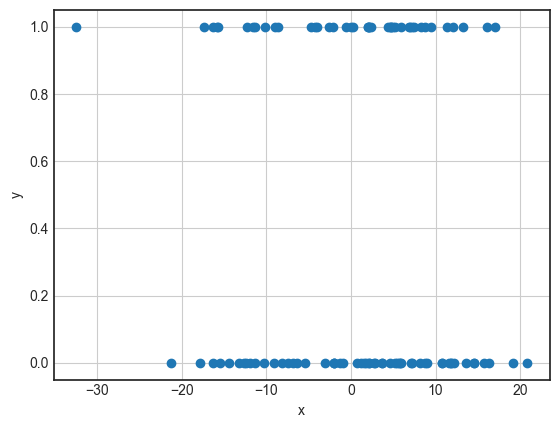

In [23]:
X = torch.randn(100, 1)*10
y = torch.randint(low=0, high=2, size=(100, 1)) # 정수로 (0, 1) 100개 생성
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

##### 신경망 구성
[로지스틱 참고 링크](https://wikidocs.net/58686)

In [33]:
model = nn.Sequential(
   nn.Linear(1, 1), # input_dim = 2, output_dim = 1
   nn.Sigmoid() # 출력은 시그모이드 함수를 거친다
)

In [24]:
# class LogisticRegressionModel(nn.Module):

#     def __init__(self):
#         super(LogisticRegressionModel, self).__init__()
#         self.logistic = nn.LogSigmoid() # 하나의 레이어만 존재하는 신경망

#     def forward(self, x):
#         pred = self.logistic(x)
#         return pred

##### 모델 생성 및 파라미터 확인

In [34]:
# torch.manual_seed(111)

# model = LogisticRegressionModel()
# print(model)

In [35]:
# 모델 parameter 확인
print(list(model.parameters()))

[Parameter containing:
tensor([[0.4311]], requires_grad=True), Parameter containing:
tensor([0.8280], requires_grad=True)]


In [36]:
# W와 b는 초기화된 상태, X를 넣어 예측값 출력
model(X)

tensor([[7.5985e-01],
        [9.9989e-01],
        [2.4116e-04],
        [9.9736e-01],
        [9.9971e-01],
        [2.0406e-03],
        [9.8985e-01],
        [8.7999e-01],
        [9.5616e-01],
        [8.4701e-01],
        [9.1551e-01],
        [9.8265e-01],
        [9.6690e-01],
        [7.6875e-03],
        [5.2761e-02],
        [8.5262e-01],
        [8.6453e-01],
        [9.9916e-01],
        [9.9877e-01],
        [9.1638e-01],
        [1.3332e-02],
        [1.5548e-02],
        [4.5408e-03],
        [9.9766e-01],
        [9.5460e-01],
        [6.3266e-02],
        [9.9956e-01],
        [9.9739e-01],
        [9.4344e-01],
        [6.3487e-01],
        [9.4716e-01],
        [1.0460e-01],
        [9.9109e-01],
        [9.9951e-01],
        [8.3132e-01],
        [2.8642e-01],
        [9.9268e-01],
        [9.9014e-01],
        [9.9672e-01],
        [5.6900e-01],
        [9.9994e-01],
        [9.7873e-01],
        [9.9709e-01],
        [9.7975e-01],
        [1.0587e-03],
        [2

In [ ]:
# # weight, bias 받아오기
# w, b = model.parameters()
# def get_params():
#     return w[0][0].item(), b[0].item()

# def plot_fit(title):
#     plt.title = title
#     w1, b1 = get_params()
#     x1 = np.array([-30, 30])
#     y1 = w1 * x1 * b1
#     plt.plot(x1, y1, 'r')
#     plt.scatter(X, y)
#     plt.show()

# plot_fit('Initial Model') # 가중치랑 bias값 초기화돼서 나오는 초기값

##### 손실함수와 옵티마이저

In [27]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

##### 모델 학습

In [ ]:
# epochs = 100
# losses = []
# for epoch in range(epochs):
#     optimizer.zero_grad()

#     y_pred = model(X)
#     loss = criterion(y_pred, y)
#     losses.append(loss)
#     loss.backward()

#     optimizer.step()

#     if epoch % 10 ==0:
#         print(f'Epoch: {epoch +1}, loss: {loss}')

##### 로지스틱 설정해둔거 경사 하강법을 사용해서 훈련, 100번의 에포크 수행

In [42]:
# y값 float으로 변경
y = y.to(torch.float32)

In [43]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(X)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 2.238053 Accuracy 48.00%
Epoch   10/1000 Cost: 24.222754 Accuracy 49.00%
Epoch   20/1000 Cost: 6.440084 Accuracy 53.00%
Epoch   30/1000 Cost: 24.187807 Accuracy 49.00%
Epoch   40/1000 Cost: 4.248149 Accuracy 52.00%
Epoch   50/1000 Cost: 1.776781 Accuracy 49.00%
Epoch   60/1000 Cost: 1.898992 Accuracy 49.00%
Epoch   70/1000 Cost: 23.767471 Accuracy 51.00%
Epoch   80/1000 Cost: 2.336026 Accuracy 53.00%
Epoch   90/1000 Cost: 15.876796 Accuracy 52.00%
Epoch  100/1000 Cost: 8.414845 Accuracy 49.00%
Epoch  110/1000 Cost: 21.390684 Accuracy 51.00%
Epoch  120/1000 Cost: 23.821796 Accuracy 51.00%
Epoch  130/1000 Cost: 15.937926 Accuracy 53.00%
Epoch  140/1000 Cost: 21.467222 Accuracy 52.00%
Epoch  150/1000 Cost: 8.269907 Accuracy 50.00%
Epoch  160/1000 Cost: 1.273208 Accuracy 51.00%
Epoch  170/1000 Cost: 3.201570 Accuracy 49.00%
Epoch  180/1000 Cost: 23.807995 Accuracy 52.00%
Epoch  190/1000 Cost: 23.823606 Accuracy 52.00%
Epoch  200/1000 Cost: 8.220888 Accuracy 49.00%
Epo

##### Model parameter 후 예측값 확인
- 0.5를 넘으면 True, 그보다 낮으면 False, 실제값은 [[0], [0], [0], [1], [1], [1]], 이는 False False False True True True에 해당되므로 실제값과 일치하도록 예측한 것을 확인 가능

In [45]:
model(X)

tensor([[1.5115e-01],
        [1.7069e-24],
        [1.0000e+00],
        [2.4730e-15],
        [8.6674e-22],
        [1.0000e+00],
        [2.0606e-11],
        [6.5184e-04],
        [4.5221e-07],
        [4.2377e-03],
        [4.8171e-05],
        [7.7557e-10],
        [6.4313e-08],
        [1.0000e+00],
        [1.0000e+00],
        [3.1636e-03],
        [1.6459e-03],
        [1.1444e-18],
        [1.4966e-17],
        [4.4639e-05],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [1.0846e-15],
        [5.7725e-07],
        [1.0000e+00],
        [1.4625e-20],
        [2.2676e-15],
        [2.7074e-06],
        [9.0632e-01],
        [1.6750e-06],
        [1.0000e+00],
        [8.5444e-12],
        [3.1986e-20],
        [9.1621e-03],
        [9.9999e-01],
        [2.2864e-12],
        [1.7008e-11],
        [1.0378e-14],
        [9.8382e-01],
        [1.4865e-26],
        [3.0997e-09],
        [4.7461e-15],
        [2.2171e-09],
        [1.0000e+00],
        [1

In [46]:
print(list(model.parameters()))

[Parameter containing:
tensor([[-2.8773]], requires_grad=True), Parameter containing:
tensor([0.4356], requires_grad=True)]


##### 시각화

In [ ]:
# fi_los = [fl.item() for fl in losses ]
# plt.plot(range(epochs), fi_los)
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.show()

In [ ]:
# plot_fit('Trained Model')